# Name:  Yucan Luo USC_ID: 8085970332

# 1. Supervised, Semi-Supervised, and Unsupervised Learning

In [1]:

import pandas as pd
import numpy as np

In [2]:
### import data 

data = pd.read_csv('../Homework 6 Data/wdbc.data', header=None)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
data.drop(0, axis=1, inplace=True)

In [5]:
data.rename(columns={1: 'class'}, inplace=True)

In [6]:
data.head()

,class,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
def split_data(X,y, test_percentage, random_state=None):
    sss = StratifiedShuffleSplit(n_splits=1, test_size=test_percentage, random_state=random_state)
    #sss.get_n_splits(X, y)
    
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        X_train = X_train.reset_index(drop=True)
        y_train = y_train.reset_index(drop=True)
        X_test = X_test.reset_index(drop=True)
        y_test = y_test.reset_index(drop=True)
    
    
    return X_train, X_test, y_train, y_test

(b) Monte-Carlo Simulation: Repeat the following procedures for supervised, un- supervised, and semi-supervised learning M = 30 times, and use randomly selected train and test data (make sure you use 20% of both the positve and nega- tive classes as the test set). Then compare the average scores (accuracy, precision, recall, F1-score, and AUC) that you obtain from each algorithm

# i. Supervised Learning

In [8]:
#normailze dataset_x
from sklearn.preprocessing import normalize

data_X = data.iloc[:,1:]
data_y = data["class"].apply(lambda x: 1 if x == 'M' else 0)
norm_X = pd.DataFrame(normalize(data_X))

In [9]:
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')


In [10]:
###L1-penalized Linear SVM, since we alread standardized the features we can use it directly ###

from sklearn.linear_model import SGDClassifier 
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score


def l1_bey_lisvm():
    
    ###set up space dictionary with specified hyperparameters
    space = {'alpha'     : hp.loguniform('alpha', -10, 0),}
    
    def fc(params):
        clf = SGDClassifier(**params,penalty='l1',early_stopping= True,n_jobs=-1) 
        best_score = cross_val_score(clf, X_train, y_train, cv=5, 
                                     scoring='accuracy', n_jobs=-1).mean() # 5-fold cv
        return 1- best_score

    
    trials = Trials()
    # Run the algorithm
    best = fmin(fn=fc,
                space=space, 
                max_evals=100, # Control how many evaluations to take
                algo=tpe.suggest,
                trials = trials)
    
    return best

In [11]:
def refit_model():
    
    
    ### train the data using beyies and get the best params 
    best_params = l1_bey_lisvm()
    
    ### refit the model using best params 
   
    l1_lin_svm = SGDClassifier(**best_params,penalty='l1',early_stopping= True,n_jobs=-1)  
    l1_lin_svm.fit(X_train, y_train)
    
    ### predict X_train  and X_test
    y_pred_train = l1_lin_svm.predict(X_train)
    y_pred_test = l1_lin_svm.predict(X_test)
    
    ### get the prob 
    y_pred_train_prob = l1_lin_svm.decision_function(X_train)
    y_pred_test_prob = l1_lin_svm.decision_function(X_test)
    
    #svc.fit(norm_X_train, y_train)
    
    return y_pred_train, y_pred_test, y_pred_train_prob, y_pred_test_prob

In [12]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report
def supervised_learning():
    info_result = list()

    
    ### recall the fucntion refit_model using best params 
    y_pred_train, y_pred_test, y_pred_train_prob, y_pred_test_prob = refit_model()
    
    # Append the train results accordingly
    train_report = classification_report(y_train, y_pred_train, output_dict=True)
    train_weighted_avg = train_report['weighted avg']
    auc_train = roc_auc_score(y_train, y_pred_train_prob)
    info_result.append(train_report['accuracy'])
    info_result.append(train_weighted_avg['precision'])
    info_result.append(train_weighted_avg['recall'])
    info_result.append(train_weighted_avg['f1-score'])
    info_result.append(auc_train)
    
    ### Append the test results accordingly 
    test_report = classification_report(y_test, y_pred_test, output_dict=True)
    test_weighted_avg = test_report['weighted avg']
    auc_test = roc_auc_score(y_test, y_pred_test_prob)
    info_result.append(test_report['accuracy'])
    info_result.append(test_weighted_avg['precision'])
    info_result.append(test_weighted_avg['recall'])
    info_result.append(test_weighted_avg['f1-score'])
    info_result.append(auc_test)
    
    return info_result
    
    

# Monte-Carlo Simulation for Supervised Learning

In [13]:

col_name = ['train_accuracy', 'train_precision', 'train_recall', 'train_f1_score', 
       'train_auc', 'test_accuracy', 'test_precision', 
       'test_recall', 'test_f1_score', 'test_auc']

supervised_result = pd.DataFrame(columns=col_name, index=range(30))


for i in range(30):
    
    ### randomly split the data with 20% positive and 20% negative test set 
    ### get the random state randomly to perform random split each time 
    rand_int = np.random.randint(1e9)
    X_train, X_test, y_train, y_test = split_data(norm_X,data_y,0.2,rand_int)
    
    if i == 10:
        print("complete 1/3")
        
    elif i == 20:
        print("complete 2/3")
        
    elif i == 30:
        print("complete")
    
    ### get the info 
    info = supervised_learning()
    
    
    supervised_result.loc[i] = info
        

100%|██████████| 100/100 [00:05<00:00, 16.71trial/s, best loss: 0.08131868131868136]
complete 1/3
100%|██████████| 100/100 [00:08<00:00, 12.10trial/s, best loss: 0.08351648351648355]
complete 2/3
100%|██████████| 100/100 [00:06<00:00, 14.91trial/s, best loss: 0.09230769230769231]


In [15]:
print("after M=30 simulations The report of Supersived Learning:")
supervised_result.mean()

after M=30 simulations The report of Supersived Learning:


train_accuracy     0.904469
train_precision    0.908416
train_recall       0.904469
train_f1_score     0.902680
train_auc          0.962769
test_accuracy      0.907018
test_precision     0.910501
test_recall        0.907018
test_f1_score      0.905631
test_auc           0.968629
dtype: float64

# Plot the ROC and report the confusion matrix for training and testing in one of the runs

In [16]:
X_train, X_test, y_train, y_test = split_data(norm_X,data_y,0.2)

### refit_model using best params 
y_pred_train, y_pred_test, y_pred_train_prob, y_pred_test_prob = refit_model()

### get confusion metrix table for train and test 
train_cm = pd.DataFrame(confusion_matrix(y_train, y_pred_train), columns= ["Predict No", "Predict Yes"],
                        index = ["Actual No", "Actual Yes"] )
test_cm = pd.DataFrame(confusion_matrix(y_test, y_pred_test), columns= ["Predict No", "Predict Yes"],
                        index = ["Actual No", "Actual Yes"] )

100%|██████████| 100/100 [00:06<00:00, 15.41trial/s, best loss: 0.09230769230769231]


In [17]:
### train confusion matrix
print("training confusion matrix")
train_cm

training confusion matrix


,Predict No,Predict Yes
Actual No,272,13
Actual Yes,32,138


In [18]:
print("test confusion matrix")
test_cm

test confusion matrix


,Predict No,Predict Yes
Actual No,72,0
Actual Yes,8,34


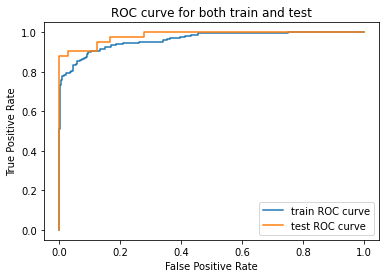

In [19]:
### get the fpr tpr thresholds 
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_pred_train_prob)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_pred_test_prob)

### plot the roc 
import matplotlib.pyplot as plt
plt.plot(train_fpr, train_tpr, label='train ROC curve')
plt.plot(test_fpr, test_tpr, label='test ROC curve')
plt.title('ROC curve for both train and test')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# ii. Semi-Supervised Learning/ Self-training

A. Train an L1-penalized SVM to classify the labeled data Use normalized data. Choose the penalty parameter using 5 fold cross validation.

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
###L1-penalized Linear SVM, since we alread standardized the features we can use it directly ###

from sklearn.linear_model import SGDClassifier 
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score


def l1_bey2_lisvm():
    
    ###set up space dictionary with specified hyperparameters
    space = {'alpha'     : hp.loguniform('alpha', -12, 0),}
    
    def fc(params):
        clf = SGDClassifier(**params,penalty='l1',early_stopping= True,n_jobs=-1) 
        best_score = cross_val_score(clf, X_train, y_train, cv=5, 
                                     scoring='accuracy', n_jobs=-1).mean() # 5-fold cv
        return 1- best_score

    
    trials = Trials()
    # Run the algorithm
    best = fmin(fn=fc,
                space=space, 
                max_evals=100, # Control how many evaluations to take
                algo=tpe.suggest,
                trials = trials)
    
    return best

In [22]:
def retrain_model(X_train,y_train, unlabeled):
    
    
    ### get the best params by using optimalization bayes to find optimal alpha 
    best_params = l1_bey2_lisvm()
    ### refit the model using best params 
    lin_svc = SGDClassifier(**best_params,penalty='l1',early_stopping= True,n_jobs=-1)  
    lin_svc.fit(X_train, y_train)
    
    
    while len(unlabeled) > 0: ### if there're still unlabeled data 
    
        # Get distance to hyperplanes for unlabelled data
        hyperplane_dist = lin_svc.decision_function(unlabeled)
        
        ### get the furthest unlabeled point index 
        abs_dist = np.abs(hyperplane_dist)
        max_idx = abs_dist.argmax() 
        
        #### Assign new y to 1 if the distance to the hyperplane is positive, otherwise, assign it to 0 
        new_y = np.where(hyperplane_dist[max_idx] >= 0, 1, 0)
        
        ###add this newly assigned data to training set
        X_train = np.vstack([X_train, unlabeled.iloc[max_idx,:]])
        y_train = np.append(y_train, new_y)
        ### drop the newly labeled data from unlabeled set 
        unlabeled = unlabeled.drop(unlabeled.index[max_idx]) 
        ### then refit the data using newly train_x
        lin_svc.fit(X_train, y_train) 
    #---------------------------------------#  
        
    ### using final svc to test on train and test set 
    ### predict X_train  and X_test
    y_pred_train = lin_svc.predict(X_train)
    y_pred_test = lin_svc.predict(X_test)
    
    ### get the prob 
    y_pred_train_prob = lin_svc.decision_function(X_train)
    y_pred_test_prob = lin_svc.decision_function(X_test)
    
    
    return y_pred_train, y_pred_test, y_pred_train_prob, y_pred_test_prob, y_train

In [23]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report
def semi_supervised_learning():
    info_result = list()
    
    ### recall the fucntion refit_model using best params 
    y_pred_train, y_pred_test, y_pred_train_prob, y_pred_test_prob, updated_y_train = retrain_model(X_train,y_train, unlabeled)
    
    # Append the train results accordingly
    train_report = classification_report(updated_y_train, y_pred_train, output_dict=True)
    train_weighted_avg = train_report['weighted avg']
    auc_train = roc_auc_score(updated_y_train, y_pred_train_prob)
    info_result.append(train_report['accuracy'])
    info_result.append(train_weighted_avg['precision'])
    info_result.append(train_weighted_avg['recall'])
    info_result.append(train_weighted_avg['f1-score'])
    info_result.append(auc_train)
    
    ### Append the test results accordingly 
    test_report = classification_report(y_test, y_pred_test, output_dict=True)
    test_weighted_avg = test_report['weighted avg']
    auc_test = roc_auc_score(y_test, y_pred_test_prob)
    info_result.append(test_report['accuracy'])
    info_result.append(test_weighted_avg['precision'])
    info_result.append(test_weighted_avg['recall'])
    info_result.append(test_weighted_avg['f1-score'])
    info_result.append(auc_test)
    
    return info_result
    
    

# Monte-Carlo Simulation for Semi-Supervised Learning

In [24]:

col_name = ['train_accuracy', 'train_precision', 'train_recall', 'train_f1_score', 
       'train_auc', 'test_accuracy', 'test_precision', 
       'test_recall', 'test_f1_score', 'test_auc']

semi_supervised_result = pd.DataFrame(columns=col_name, index=range(30))

### first divide wholw dataset into training and test set 
training_x, X_test, training_y, y_test = split_data(norm_X,data_y,0.2,42)
for i in range(30):
    
    rand_int = np.random.randint(1e9)
    
    ### randomly split the data with 50% positive and 50% negative as labeled using training set 
    ### get the random state randomly to perform random split each time 
    X_train, unlabeled, y_train, _ = split_data(training_x, training_y, 0.5, rand_int)
    
    if i == 10:
        print("complete 1/3")
        
    elif i == 20:
        print("complete 2/3")
        
    elif i == 30:
        print("complete")
    
    ### get the info 
    info = semi_supervised_learning()
    
    
    semi_supervised_result.loc[i] = info
        

100%|██████████| 100/100 [00:05<00:00, 17.72trial/s, best loss: 0.07526570048309167]
complete 1/3
100%|██████████| 100/100 [00:06<00:00, 16.58trial/s, best loss: 0.07922705314009659]
complete 2/3
100%|██████████| 100/100 [00:06<00:00, 15.72trial/s, best loss: 0.08396135265700477]


In [25]:
print("after m=30 simulations The report of Semi-Supersived Learning:")
semi_supervised_result.mean()

after m=30 simulations The report of Semi-Supersived Learning:


train_accuracy     0.906081
train_precision    0.933216
train_recall       0.906081
train_f1_score     0.897708
train_auc          0.978878
test_accuracy      0.849708
test_precision     0.884534
test_recall        0.849708
test_f1_score      0.837186
test_auc           0.947994
dtype: float64

# Plot the ROC and report the confusion matrix for training and testing in one of the runs

In [26]:

#------one of run ----------#
### first divide wholw dataset into training and test set 
training_x, X_test, training_y, y_test = split_data(norm_X,data_y,0.2,42)


X_train, unlabeled, y_train, _ = split_data(training_x, training_y, 0.5)

### retrain_model for unlabeled data 
y_pred_train, y_pred_test, y_pred_train_prob, y_pred_test_prob, updated_y_train = retrain_model(X_train,y_train, unlabeled)

### get confusion metrix table for train and test 
semi_train_cm = pd.DataFrame(confusion_matrix(updated_y_train, y_pred_train), columns= ["Predict No", "Predict Yes"],
                        index = ["Actual No", "Actual Yes"] )
semi_test_cm = pd.DataFrame(confusion_matrix(y_test, y_pred_test), columns= ["Predict No", "Predict Yes"],
                        index = ["Actual No", "Actual Yes"] )

100%|██████████| 100/100 [00:05<00:00, 16.92trial/s, best loss: 0.06628019323671486]


In [27]:
### train confusion matrix
print("training confusion matrix for semi_supervised learning")
semi_train_cm

training confusion matrix for semi_supervised learning


,Predict No,Predict Yes
Actual No,302,2
Actual Yes,14,137


In [28]:
print("test confusion matrix for semi_supervised learning")
semi_test_cm

test confusion matrix for semi_supervised learning


,Predict No,Predict Yes
Actual No,72,0
Actual Yes,13,29


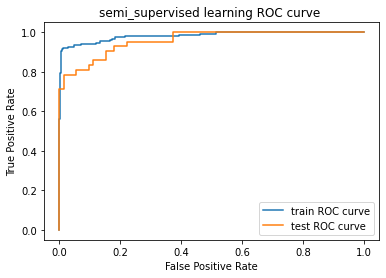

In [29]:
### get the fpr tpr thresholds 
train_fpr, train_tpr, train_thresholds = roc_curve(updated_y_train, y_pred_train_prob)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_pred_test_prob)

### plot the roc 
import matplotlib.pyplot as plt
plt.plot(train_fpr, train_tpr, label='train ROC curve')
plt.plot(test_fpr, test_tpr, label='test ROC curve')
plt.title('semi_supervised learning ROC curve ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# iii. Unsupervised Learning

A. Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum?

ans : we might aviod local trapped by a local minimum by setting n_init = 100 is to run K-means multiple times and then choosing the run that gives the lowest error


In [30]:
### prepare the data again 
X_train, X_test, y_train, y_test = split_data(norm_X,data_y,0.2,42)

In [31]:

from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(n_clusters=2,  ### k = 2 
                         batch_size=50,
                         n_init=100,    ### set n_init = 100 to aviod local minimum 
                         random_state=42)

##Compute cluster centers and predict cluster index for each sample in X_train.
cluster_label_train = kmeans.fit_predict(X_train)
cluster_label_test = kmeans.predict(X_test)
## Transform X_train to a cluster-distance space. 
dist_to_center = kmeans.transform(X_train)  

B. Compute the centers of the two clusters and find the closest 30 datapoints to each center.¶

In [32]:
from statistics import mode
def get_majority_label(distance,cluster_n,y_train):
    re_dist = list(enumerate(distance))
    ### sort the distance list accordingly and get first 30 
    closest_30 = sorted(re_dist, key=lambda i : i[1][cluster_n])[:30]
    indices = [i[0] for i in closest_30]
    ### get the most frequent label 
    mode_label = mode(y_train[indices])
    
    return mode_label


In [33]:
majority_label0 = get_majority_label(dist_to_center,0,y_train) ### cluster 0
majority_label1 = get_majority_label(dist_to_center,1,y_train) ### cluster 1 

In [34]:
### assign the majority label to each cluster 
cluster_label_train = np.where(cluster_label_train==0, majority_label0, majority_label1)


# plot test and training ROC and the confusion matrix for one of the runs

In [35]:
train_cm = pd.DataFrame(confusion_matrix(y_train, cluster_label_train), columns= ["Predict No", "Predict Yes"],
                        index = ["Actual No", "Actual Yes"] )
train_cm

,Predict No,Predict Yes
Actual No,274,11
Actual Yes,35,135


C. Classify test data based on their proximity to the centers of the clusters.

Report the average accuracy, precision, recall, F-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs for the test data.

In [36]:
cluster_label_test = np.where(cluster_label_test==0, majority_label0, majority_label1)

In [37]:
test_cm = pd.DataFrame(confusion_matrix(y_test, cluster_label_test), columns= ["Predict No", "Predict Yes"],
                        index = ["Actual No", "Actual Yes"] )
test_cm

,Predict No,Predict Yes
Actual No,72,0
Actual Yes,13,29


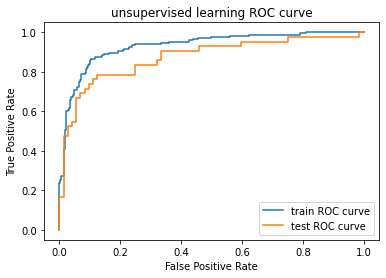

In [38]:
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, pd.DataFrame(kmeans.transform(X_train)).iloc[:,1])
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, pd.DataFrame(kmeans.transform(X_test)).iloc[:,1])
plt.plot(train_fpr, train_tpr, label='train ROC curve')
plt.plot(test_fpr, test_tpr, label='test ROC curve')
plt.title('unsupervised learning ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Monte-Carlo Simulation for unsupervised learning(M=30)

In [39]:
def unsupervised_learning():
    
    info_result = list()

    kmeans = MiniBatchKMeans(n_clusters=2,  ### k = 2 
                         batch_size=50,
                         n_init=100, )   ### set n_init = 100 to aviod local minimum 

    ##Compute cluster centers and predict cluster index for each sample in X_train.
    cluster_label_train = kmeans.fit_predict(X_train)
    cluster_label_test = kmeans.predict(X_test)
    ## Transform X_train to a cluster-distance space. 
    dist_to_center = kmeans.transform(X_train)  
    
    
    ### get the majority label 
    majority_label0 = get_majority_label(dist_to_center,0,y_train) ### cluster 0
    majority_label1 = get_majority_label(dist_to_center,1,y_train) ### cluster 1 
    
    ### assign the majority label to each cluster 
    cluster_label_train = np.where(cluster_label_train==0, majority_label0, majority_label1)
    cluster_label_test = np.where(cluster_label_test==0, majority_label0, majority_label1)
    
    ##AUC
    if(majority_label0==0):
        train_auc = roc_auc_score(y_train, pd.DataFrame(kmeans.transform(X_train)).iloc[:,0])
        test_auc = roc_auc_score(y_test, pd.DataFrame(kmeans.transform(X_test)).iloc[:,0])
    

    else:
        train_auc = roc_auc_score(y_train, pd.DataFrame(kmeans.transform(X_train)).iloc[:,1])
        test_auc = roc_auc_score(y_test, pd.DataFrame(kmeans.transform(X_test)).iloc[:,1])
    
     # Append the train results accordingly
    train_report = classification_report(y_train, cluster_label_train, output_dict=True)
    train_weighted_avg = train_report['weighted avg']
    info_result.append(train_report['accuracy'])
    info_result.append(train_weighted_avg['precision'])
    info_result.append(train_weighted_avg['recall'])
    info_result.append(train_weighted_avg['f1-score'])
    info_result.append(train_auc)
    
    ### Append the test results accordingly 
    test_report = classification_report(y_test, cluster_label_test, output_dict=True)
    test_weighted_avg = test_report['weighted avg']
    info_result.append(test_report['accuracy'])
    info_result.append(test_weighted_avg['precision'])
    info_result.append(test_weighted_avg['recall'])
    info_result.append(test_weighted_avg['f1-score'])
    info_result.append(test_auc)
    
    return info_result
    
    
    
    
    

In [40]:
# Monte-Carlo simulation for unsupervised learning

col_name = ['train_accuracy', 'train_precision', 'train_recall', 'train_f1_score', 
       'train_auc', 'test_accuracy', 'test_precision', 
       'test_recall', 'test_f1_score', 'test_auc']

unsupervised_result = pd.DataFrame(columns=col_name, index=range(30))


for i in range(30):
    
    rand_int = np.random.randint(1e9)
    
    X_train, X_test, y_train, y_test = split_data(norm_X,data_y,0.2,rand_int)
    
    if i == 10:
        print("complete 1/3")
        
    elif i == 20:
        print("complete 2/3")
        
    elif i == 29:
        print("complete")
    
    ### get the info 
    info = unsupervised_learning()
    
    
    unsupervised_result.loc[i] = info

complete 1/3
complete 2/3
complete


In [41]:
print("The Monte_Carlo result of unsupervised learning:")
unsupervised_result.mean()

The Monte_Carlo result of unsupervised learning:


train_accuracy     0.887253
train_precision    0.895821
train_recall       0.887253
train_f1_score     0.883385
train_auc          0.911057
test_accuracy      0.888012
test_precision     0.897998
test_recall        0.888012
test_f1_score      0.883621
test_auc           0.915642
dtype: float64

# iv. Spectral Clustering

In [42]:
### prepare the data again 
X_train, X_test, y_train, y_test = split_data(norm_X,data_y,0.2,42)


In [43]:
from sklearn.cluster import SpectralClustering

spec_clust = SpectralClustering(n_clusters=2,
                                gamma = 1,
                                affinity='rbf',
                                n_init=100,
                                random_state=42,
                                n_jobs=-1)
spec_clust.fit(X_train)
labels = spec_clust.labels_
### using fit_predict to get label
cluster_label_train = spec_clust.fit_predict(X_train)
cluster_label_test = spec_clust.fit_predict(X_test)

In [44]:
### get cluster index  in train 
cluster_index0 = np.where(labels==0) # cluter 0 
cluster_index1 = np.where(labels==1) # cluster 1 

### get majority label from most prequent 
majority_label0 = mode(y_train.iloc[cluster_index0])
majority_label1 = mode(y_train.iloc[cluster_index1])

### assign majority label to each clusters  
### if it's cluster 0, then assign majority_label0
cluster_label_train = np.where(cluster_label_train==0, majority_label0, majority_label1)
cluster_label_test = np.where(cluster_label_test==0, majority_label0, majority_label1)



In [45]:
#confusion matrix of training data
tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train,cluster_label_train).ravel()
print(f'True Positives: {tp_train}')
print(f'False Positives: {fp_train}')
print(f'True Negatives: {tn_train}')
print(f'False Negatives: {fn_train}')
train_cm = pd.DataFrame(confusion_matrix(y_train, cluster_label_train), columns= ["Predict No", "Predict Yes"],
                        index = ["Actual No", "Actual Yes"] )
train_cm

True Positives: 122
False Positives: 6
True Negatives: 279
False Negatives: 48


,Predict No,Predict Yes
Actual No,279,6
Actual Yes,48,122


In [46]:
#confusion matrix for test data 
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test,cluster_label_test).ravel()
print(f'True Positives: {tp_test}')
print(f'False Positives: {fp_test}')
print(f'True Negatives: {tn_test}')
print(f'False Negatives: {fn_test}')
test_cm = pd.DataFrame(confusion_matrix(y_test, cluster_label_test), columns= ["Predict No", "Predict Yes"],
                        index = ["Actual No", "Actual Yes"] )
test_cm

True Positives: 28
False Positives: 0
True Negatives: 72
False Negatives: 14


,Predict No,Predict Yes
Actual No,72,0
Actual Yes,14,28


In [47]:
from sklearn.metrics import pairwise_distances
#ROC curve
test_dis = pairwise_distances(X_test, X_train, n_jobs=10)
train_dis = pairwise_distances(X_train, X_train, n_jobs=10)
train_min_0 = np.amin(train_dis[:,cluster_index0[0]], axis = 1).reshape(-1,1)
train_min_1 = np.amin(train_dis[:,cluster_index1[0]], axis = 1).reshape(-1, 1)
train_min = np.concatenate((train_min_0, train_min_1), axis=1)
train_pro_class0 = (train_min[:, 0] / np.sum(train_min, axis=1))
test_min_0 = np.amin(test_dis[:,cluster_index0[0]], axis = 1).reshape(-1,1)
test_min_1 = np.amin(test_dis[:,cluster_index1[0]], axis = 1).reshape(-1, 1)
test_min = np.concatenate((test_min_0, test_min_1), axis=1)
test_pro_class0 = (test_min[:, 0] / np.sum(test_min, axis=1))

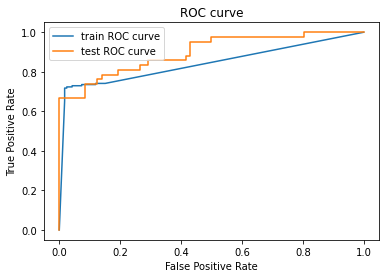

In [48]:
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, train_pro_class0)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_pro_class0)
plt.plot(train_fpr, train_tpr, label='train ROC curve')
plt.plot(test_fpr, test_tpr, label='test ROC curve')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Monte-Carlo Simulation for Spectral Clustering(M=30)


In [49]:
def spec_clustering():
    
    info_result = list()
    
    spec_clust = SpectralClustering(n_clusters=2,
                                gamma = 1,
                                affinity='rbf',
                                n_init=100,
                                random_state=42,
                                n_jobs=-1)
    spec_clust.fit(X_train)
    labels = spec_clust.labels_
    ### using fit_predict to get label
    cluster_label_train = spec_clust.fit_predict(X_train)
    cluster_label_test = spec_clust.fit_predict(X_test)
    
    ### get cluster index  in train 
    cluster_index0 = np.where(labels==0) # cluter 0 
    cluster_index1 = np.where(labels==1) # cluster 1 

    ### get majority label from most prequent 
    majority_label0 = mode(y_train.iloc[cluster_index0])
    majority_label1 = mode(y_train.iloc[cluster_index1])

    ### assign majority label to each clusters  
    ### if it's cluster 0, then assign majority_label0
    cluster_label_train = np.where(cluster_label_train==0, majority_label0, majority_label1)
    cluster_label_test = np.where(cluster_label_test==0, majority_label0, majority_label1)
    
    #AUC score
    test_dis = pairwise_distances(X_test, X_train, n_jobs=10)
    train_dis = pairwise_distances(X_train, X_train, n_jobs=10)
    train_min_0 = np.amin(train_dis[:,cluster_index0[0]], axis = 1).reshape(-1,1)
    train_min_1 = np.amin(train_dis[:,cluster_index1[0]], axis = 1).reshape(-1, 1)
    train_min = np.concatenate((train_min_0, train_min_1), axis=1)
    train_pro_class0 = (train_min[:, 0] / np.sum(train_min, axis=1))
    test_min_0 = np.amin(test_dis[:,cluster_index0[0]], axis = 1).reshape(-1,1)
    test_min_1 = np.amin(test_dis[:,cluster_index1[0]], axis = 1).reshape(-1, 1)
    test_min = np.concatenate((test_min_0, test_min_1), axis=1)
    test_pro_class0 = (test_min[:, 0] / np.sum(test_min, axis=1))
    train_auc = roc_auc_score(y_train, train_pro_class0)
    test_auc = roc_auc_score(y_test, test_pro_class0)
    
    
     # Append the train results accordingly
    train_report = classification_report(y_train, cluster_label_train, output_dict=True)
    train_weighted_avg = train_report['weighted avg']
    info_result.append(train_report['accuracy'])
    info_result.append(train_weighted_avg['precision'])
    info_result.append(train_weighted_avg['recall'])
    info_result.append(train_weighted_avg['f1-score'])
    info_result.append(train_auc)
    
    ### Append the test results accordingly 
    test_report = classification_report(y_test, cluster_label_test, output_dict=True)
    test_weighted_avg = test_report['weighted avg']
    info_result.append(test_report['accuracy'])
    info_result.append(test_weighted_avg['precision'])
    info_result.append(test_weighted_avg['recall'])
    info_result.append(test_weighted_avg['f1-score'])
    info_result.append(test_auc)
    
    return info_result 

In [50]:
# Monte-Carlo simulation for spetral clustering 

col_name = ['train_accuracy', 'train_precision', 'train_recall', 'train_f1_score', 
       'train_auc', 'test_accuracy', 'test_precision', 
       'test_recall', 'test_f1_score', 'test_auc']

spec_clustering_result = pd.DataFrame(columns=col_name, index=range(30))


for i in range(30):
    
    rand_int = np.random.randint(1e9)
    
    X_train, X_test, y_train, y_test = split_data(norm_X,data_y,0.2,rand_int)
    
    if i == 10:
        print("complete 1/3")
        
    elif i == 20:
        print("complete 2/3")
        
    elif i == 29:
        print("complete")
    
    ### get the info 
    info = spec_clustering()
    
    
    spec_clustering_result.loc[i] = info

complete 1/3
complete 2/3
complete


In [51]:
print("The Monte_Carlo result of spec_clustering :")
spec_clustering_result.mean()

The Monte_Carlo result of spec_clustering :


train_accuracy     0.883810
train_precision    0.894372
train_recall       0.883810
train_f1_score     0.879387
train_auc          0.638971
test_accuracy      0.527778
test_precision     0.518937
test_recall        0.527778
test_f1_score      0.514363
test_auc           0.675298
dtype: float64

# v. Compare 
Spectral Clustering: Repeat ?? using spectral clustering, which is cluster-
3
One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled.One can expect that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods.

In [52]:
compare_table = pd.DataFrame({'supervised':supervised_result.mean(), 
                              'semi_supervised':semi_supervised_result.mean(),
                              'unsupervised':unsupervised_result.mean(), 
                              'spectral_clustering':spec_clustering_result.mean()})
round(compare_table,4)

,supervised,semi_supervised,unsupervised,spectral_clustering
train_accuracy,0.9045,0.9061,0.8873,0.8838
train_precision,0.9084,0.9332,0.8958,0.8944
train_recall,0.9045,0.9061,0.8873,0.8838
train_f1_score,0.9027,0.8977,0.8834,0.8794
train_auc,0.9628,0.9789,0.9111,0.6390
test_accuracy,0.9070,0.8497,0.8880,0.5278
test_precision,0.9105,0.8845,0.8980,0.5189
test_recall,0.9070,0.8497,0.8880,0.5278
test_f1_score,0.9056,0.8372,0.8836,0.5144
test_auc,0.9686,0.9480,0.9156,0.6753


From the compare table, supervised learning on the full data set performs similarly to the semi-supervised learning with half of the data set labeled in terms of training metrics. however, based on test metrics, the supervised performs bettern than semi_supervised learning. also, both supervised and semi_supervised performs better than unspervised learning. the spectral_clustering performs worst among all. 


# 2. Active Learning Using Support Vector Machines

# (a) Download the banknote authentication Data Set

In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
import pandas as pd
import numpy as np
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

In [3]:
bank_data = pd.read_csv('../Homework 6 Data/data_banknote_authentication.txt', header=None)

In [4]:
bank_data

,0,1,2,3,4
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [5]:
### first four columns are features and last column are ouptut 
X= bank_data.iloc[:,:-1]
y= bank_data[4]
X.head()

,0,1,2,3
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [14]:

def refit(X_train, y_train,X_test,y_test):
    
    ### tuning params 
    parameters = {'C':np.power(10, np.arange(-3, 7,0.5))}
    svc = LinearSVC(penalty='l1', dual=False)
    clf = GridSearchCV(svc, parameters, cv=5) ## 5fold
    clf.fit(X_train, y_train)
    best_C = clf.best_params_['C']

    # Refit the model with the best params
    svc = LinearSVC(penalty='l1', dual=False, C=best_C, max_iter=10000)
    svc.fit(X_train, y_train)
        
    test_error = 1-svc.score(X_test, y_test)

    return test_error 

In [17]:
test_size = 472/(472+900)

### (b) Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure.

In [360]:
def select_10_sample(x, y):
    select_x = pd.DataFrame()
    select_y = pd.DataFrame()
    #try to keep balance of select sample
    while len(select_y) < 1 or len(np.bincount(select_y)) < 2 or np.bincount(select_y).min() < 2:
        ### get 10 random points 
        rand_index = np.random.randint(0,x.shape[0],10)
        select_x = x.iloc[rand_index]
        select_y = y.iloc[rand_index]
    
    ### drop the selection random index points and get remaining points 
    unselect_x = x.drop(x.index[rand_index])
    unselect_y = y.drop(y.index[rand_index])
    
    #reset index
    select_x = select_x.reset_index(drop=True)
    select_y = select_y.reset_index(drop=True)
    unselect_x = unselect_x.reset_index(drop=True)
    unselect_y = unselect_y.reset_index(drop=True)
    return select_x, select_y, unselect_x, unselect_y

In [361]:
def passive_learning():
    
  
    X_train_whole, X_test, y_train_whole, y_test = train_test_split(X, y, test_size=test_size, 
                                                                    stratify=y)
    #first select, get 10 sample as the first training data
    select_x, select_y, unselect_x, unselect_y = select_10_sample(X_train_whole, y_train_whole)
    
    
    passive_test_error = list()
    
    for i in range(90):
        test_error = refit(select_x, select_y, X_test,y_test)
        
        passive_test_error.append(test_error)
        if(i!=89):
            ### without replacement, we get another random sample 10 points and get index from unselect 
            new_select_x = unselect_x.sample(n=10, replace=False, random_state=None, axis=0)
            rand_index = np.array(new_select_x.index)
            new_select_y = unselect_y.iloc[rand_index]
            
            ### drop the points we select from unselect 
            unselect_x = unselect_x.drop(unselect_x.index[rand_index])
            unselect_y = unselect_y.drop(unselect_y.index[rand_index])
            
            #reset index
            unselect_x = unselect_x.reset_index(drop=True)
            unselect_y = unselect_y.reset_index(drop=True)
            
            ### update select_x , and select_y 
            select_x = pd.concat([select_x, new_select_x],axis=0)
            select_y = pd.concat([select_y, new_select_y],axis=0)
             
    
    return passive_test_error

# procedures 50 times

In [362]:
passive_result = list()
for i in range(50):
    print("complete", i, "times")
    passive_error = passive_learning()
    passive_result.append(passive_error)

complete 0 times
complete 1 times
complete 2 times
complete 3 times
complete 4 times
complete 5 times
complete 6 times
complete 7 times
complete 8 times
complete 9 times
complete 10 times
complete 11 times
complete 12 times
complete 13 times
complete 14 times
complete 15 times
complete 16 times
complete 17 times
complete 18 times
complete 19 times
complete 20 times
complete 21 times
complete 22 times
complete 23 times
complete 24 times
complete 25 times
complete 26 times
complete 27 times
complete 28 times
complete 29 times
complete 30 times
complete 31 times
complete 32 times
complete 33 times
complete 34 times
complete 35 times
complete 36 times
complete 37 times
complete 38 times
complete 39 times
complete 40 times
complete 41 times
complete 42 times
complete 43 times
complete 44 times
complete 45 times
complete 46 times
complete 47 times
complete 48 times
complete 49 times


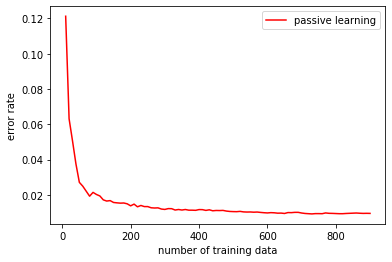

In [393]:
#plot the average result
plt.plot(np.arange(1,91)*10, passive_result.mean(), c='r',label='passive learning')
plt.xlabel('number of training data')
plt.ylabel('error rate')
plt.legend()
plt.show()

####  ii. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty.
    Select the parameters of the SVM with 10-fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning.

In [2]:
def find_best_params(select_x,select_y):
    parameters = {'C':np.power(10, np.arange(-3, 7,0.5))}
    svc = LinearSVC(penalty='l1', dual=False)
    clf = GridSearchCV(svc, parameters, cv=5)
    clf.fit(select_x, select_y)
    best_C = clf.best_params_['C']
    
    return best_C

In [383]:
def active_learning():
    X_train_whole, X_test, y_train_whole, y_test = train_test_split(X, y, test_size=test_size, 
                                                                    stratify=y)
    #first select, get 10 sample as the first training data
    select_x, select_y, unselect_x, unselect_y = select_10_sample(X_train_whole, y_train_whole)
    active_errors = list()
     
    for i in range(90):
        
        ### get the best_c 
        best_C = find_best_params(select_x,select_y)

        # Refit the model with the best params
        svc = LinearSVC(penalty='l1', dual=False, C=best_C,max_iter=10000)
        svc.fit(select_x, select_y)
        
        # get the test_error 
        test_error = 1-svc.score(X_test,y_test)
        
        active_errors.append(test_error)
        
        if(i!=89): # if i == 89, means we have select all 900 points 
            ### choose the closest 10 points 
            distances = svc.decision_function(unselect_x)
            closest = np.argsort(abs(distances))[:10]
            ### get new select x and y based on 10 closest index 
            new_select_x = unselect_x.iloc[closest,:]
            new_select_y = unselect_y.iloc[closest]
            ### drop the already selected points from unselect 
            unselect_x = unselect_x.drop(unselect_x.index[closest])
            unselect_y = unselect_y.drop(unselect_y.index[closest])
            
            #reset index
            unselect_x = unselect_x.reset_index(drop=True)
            unselect_y = unselect_y.reset_index(drop=True)
            ### concatenate new select_x with old one together 
            select_x = pd.concat([select_x, new_select_x],axis=0)
            select_y = pd.concat([select_y, new_select_y],axis=0)
            
    return active_errors

# procedures 50 times

In [384]:
active_result = list()
for i in range(50):
    print("complete", i, "times")
    active_error = active_learning()
    active_result.append(active_error)

complete 0 times
complete 1 times
complete 2 times
complete 3 times
complete 4 times
complete 5 times
complete 6 times
complete 7 times
complete 8 times
complete 9 times
complete 10 times
complete 11 times
complete 12 times
complete 13 times
complete 14 times
complete 15 times
complete 16 times
complete 17 times
complete 18 times
complete 19 times
complete 20 times
complete 21 times
complete 22 times
complete 23 times
complete 24 times
complete 25 times
complete 26 times
complete 27 times
complete 28 times
complete 29 times
complete 30 times
complete 31 times
complete 32 times
complete 33 times
complete 34 times
complete 35 times
complete 36 times
complete 37 times
complete 38 times
complete 39 times
complete 40 times
complete 41 times
complete 42 times
complete 43 times
complete 44 times
complete 45 times
complete 46 times
complete 47 times
complete 48 times
complete 49 times


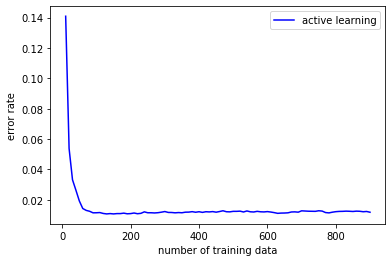

In [389]:
#plot the average result for 50 runs 
plt.plot(np.arange(1,91)*10, active_result_df.mean(), c='b',label='active learning')
plt.xlabel('number of training data')
plt.ylabel('error rate')
plt.legend()
plt.show()

#### (c) Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. 
    By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions. Here, you are actually obtaining a learning curve by Monte-Carlo simulation.

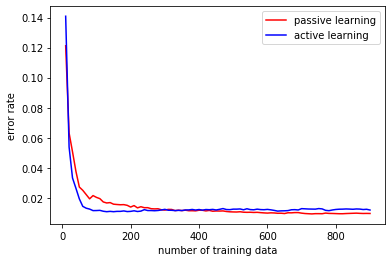

In [395]:
### plot together 
plt.plot(np.arange(1,91)*10, passive_result.mean() , c='r',label='passive learning')
plt.plot(np.arange(1,91)*10, active_result_df.mean(), c='b', label='active learning')
plt.xlabel('number of training data')
plt.ylabel('error rate')
plt.legend()
plt.show()

##### conclusion:
    from the plot, We can directly see thay active learning is better when number of training data is small. Howeverm, with the increase of number of training data, the passive learning will become as well as active learning. also, the test error will continuely drop as the number of training points increases, however, the change vary little when number of training data are large. both plot display a elbow shape. 